In [1]:
import pickle
import os
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from qiskit import  QuantumCircuit, transpile
import random
import math

In [2]:
included_n_qubits = [6, 8]

baseline_dirs = [f'/home/luliqiang/4_2/extra/quantum-circuit-synthesis/experiment_results',]
quct_dirs = ['6/result', '8/result']


In [74]:
baseline_results = []

dir_files = []

for baseline_dir in baseline_dirs:
    for dirpath, dirnames, filenames in os.walk(baseline_dir):
        for filename in filenames:
            if 'json' not in filename or 'pkl' in filename:
                continue

            if not any([f'random-{n_qubits}' in filename for n_qubits in included_n_qubits]):
                continue

            print(filename)
            with open(os.path.join(dirpath, filename), mode='r') as f:
                result_dict = json.load(f)
            baseline_results.append(result_dict)


for result_dict in baseline_results:
    picked_unitary = json.loads(result_dict['Unitary']).encode('latin-1')
    U = pickle.loads(picked_unitary)
    result_dict['U'] = U
    result_dict['n_qubits'] = int(math.log2(result_dict['U'].shape[0]))

linear-random-6-2.json
random-6-7.json
random-6-1.json
random-6-2.json
random-6-5.json
random-6-9.json
random-8-7.json
random-8-2.json
random-8-0.json
random-8-4.json
random-6-3.json
random-8-6.json
random-6-0.json
linear-random-6-5.json
linear-random-6-1.json
random-8-5.json
linear-random-6-9.json
random-8-1.json
random-8-9.json
random-8-8.json
linear-random-6-3.json
linear-random-6-8.json
linear-random-6-6.json
linear-random-6-7.json
random-6-4.json
random-6-6.json
random-6-8.json
linear-random-6-0.json
linear-random-6-4.json
random-8-3.json


In [76]:
baseline_results[0].keys(), baseline_results[0]['Metrics'][0].keys()

(dict_keys(['Experiment Name', 'Unitary', 'Num of Qubits', 'Metrics', 'U', 'n_qubits']),
 dict_keys(['Synthesiser', 'Circuit', 'Execution Time', 'CNOT Count', 'Depth', 'Parallelism', 'CPU time', 'gate_num']))

In [77]:
synthesized_filenames = []
results = []

for quct_dir in quct_dirs:
    for dirpath, dirnames, filenames in os.walk(quct_dir):
        for filename in filenames:
            if 'pkl' not in filename:  # 'change_func' not in filename or
                continue
            
            print(filename)
            with open(os.path.join(dirpath, filename), mode='rb') as f:
                result_dict = pickle.load(f)
            
            result_dict['baseline_name'] =  filename.split('_')[2]
            result_dict['n_qubits'] = int(math.log2(result_dict['U'].shape[0]))
            results.append(result_dict)
        

False_18_1_12.pkl
False_18_0_12.pkl
False_24_1_16.pkl
False_24_0_16.pkl


In [78]:
results[0].keys()

dict_keys(['n_qubits', 'U', 'qiskit circuit', '#gate', '#two-qubit gate', 'depth', 'cpu time', 'use heuristic', 'n_unitary_candidates', 'n_neighbors', 'print', 'heuristic_takeeffect_count', 'heuristic_takeeffect_prob', 'iter_count', 'synthesis_time', 'baseline_name'])

In [103]:
merge_results = []
for quct_result in results:
    # print(quct_result['baseline_name'])
    U = quct_result['U']

    merge_result = {
        'U': U,
        'filename': quct_result['baseline_name'],
        'cpu_time': {},
        'time': {},
        '#two-qubit': {},
        '#gate': {},
        'depth': {},
        'n_qubits': quct_result['n_qubits'],
    }

    # dict_keys(['n_qubits', 'U', 'qiskit circuit', '#gate', '#two-qubit gate', 'depth', 'cpu time', 'use heuristic', 'n_unitary_candidates', 'n_neighbors', 'print', 'heuristic_takeeffect_count', 
    # 'heuristic_takeeffect_prob', 'iter_count', 'synthesis_time'])

    if 1000 < quct_result['#two-qubit gate'] and quct_result['n_qubits'] == 6:
        continue

    # print(quct_result['#two-qubit gate'])
    merge_results.append(merge_result)
    merge_result['#two-qubit']['quct'] = quct_result['#two-qubit gate']
    merge_result['time']['quct'] = quct_result['synthesis_time']
    merge_result['#gate']['quct'] = quct_result['#gate']
    merge_result['depth']['quct'] = quct_result['depth']
    merge_result['cpu_time']['quct'] = quct_result['cpu time']

    
    print(quct_result['n_qubits'] ,quct_result['#two-qubit gate'], quct_result['iter_count'])

857
6 857 109
8748
8 8748 92
9202
8 9202 96


In [91]:

n_qubits_list = []
for baseline_result in baseline_results:
    # print(quct_result['baseline_name'])
    merge_result = {
        'U': U,
        # 'filename': quct_result['baseline_name'],
        'cpu_time': {},
        'time': {},
        '#two-qubit': {},
        '#gate': {},
        'depth': {},
        'n_qubits': baseline_result['n_qubits'],
    }

    '''反正也不变一个就够了'''
    if baseline_result['n_qubits'] in n_qubits_list:
        continue
    n_qubits_list.append(baseline_result['n_qubits'])

    merge_results.append(merge_result)

    # (dict_keys(['Experiment Name', 'Unitary', 'Num of Qubits', 'Metrics', 'U']),
    # dict_keys(['Synthesiser', 'Circuit', 'Execution Time', 'CNOT Count', 'Depth', 'Parallelism', 'CPU time', 'gate_num']))
        # baseline_name = metric['Synthesiser']
    for metric in baseline_result['Metrics']:
        baseline_name = metric['Synthesiser'].replace(' Synthesiser', '').replace(' synthesiser', '')
        qiskit_circuit = QuantumCircuit.from_qasm_str(metric['Circuit'])

        # if 'QFast' in baseline_name:
        #     qiskit_circuit = transpile(qiskit_circuit, optimization_level=3, basis_gates=['u', 'cz'])
        # else:
        # qiskit_circuit = transpile(qiskit_circuit, optimization_level=1, basis_gates=['u', 'cz'], coupling_map=[[start, start+1] for start in range(baseline_result['n_qubits'])])

        # print(metric.keys())
        merge_result['#two-qubit'][baseline_name] = metric['CNOT Count']
        merge_result['time'][baseline_name] = metric['Execution Time']
        merge_result['#gate'][baseline_name] = len(qiskit_circuit)#metric['gate_num']
        merge_result['depth'][baseline_name] = metric['Depth'] #qiskit_circuit.depth()


In [81]:

# for quct_result in results:
#     # print(quct_result['baseline_name'])
#     U = quct_result['U']

#     merge_result = {
#         'U': U,
#         'filename': quct_result['baseline_name'],
#         'cpu_time': {},
#         'time': {},
#         '#two-qubit': {},
#         '#gate': {},
#         'depth': {},
#         'n_qubits': quct_result['n_qubits'],
#     }

#     # dict_keys(['n_qubits', 'U', 'qiskit circuit', '#gate', '#two-qubit gate', 'depth', 'cpu time', 'use heuristic', 'n_unitary_candidates', 'n_neighbors', 'print', 'heuristic_takeeffect_count', 
#     # 'heuristic_takeeffect_prob', 'iter_count', 'synthesis_time'])

#     merge_results.append(merge_result)
#     merge_result['#two-qubit']['quct'] = quct_result['#two-qubit gate']
#     merge_result['time']['quct'] = quct_result['synthesis_time']
#     merge_result['#gate']['quct'] = quct_result['#gate']
#     merge_result['depth']['quct'] = quct_result['depth']
#     merge_result['cpu_time']['quct'] = quct_result['cpu time']

#     if 6 == quct_result['n_qubits']:
#         print(quct_result['#two-qubit gate'])

In [92]:
total_merge_results = merge_results

In [93]:
merge_results[0]

{'U': array([[ 0.09824995-0.09788316j,  0.15821015-0.11078755j,
         -0.04368579-0.0218081j , ...,  0.02475077+0.12246191j,
          0.06400863+0.00279972j,  0.04342369+0.10467974j],
        [ 0.01063843-0.11616004j, -0.17067978+0.11501164j,
         -0.03405666-0.03615683j, ..., -0.03932229+0.191413j  ,
          0.10047785-0.04227888j, -0.04208585+0.08046514j],
        [ 0.06747683+0.01013313j,  0.02074209-0.02600986j,
         -0.03503027-0.00601939j, ...,  0.02273767-0.03644906j,
         -0.11936857+0.03728653j, -0.08636503-0.12585095j],
        ...,
        [ 0.05921913-0.05913618j,  0.03528755-0.10935917j,
         -0.15575372-0.08693674j, ..., -0.04001656-0.19015205j,
          0.02104077-0.08341824j, -0.11857665-0.01415018j],
        [ 0.07676642-0.04912453j,  0.14173838+0.10445647j,
         -0.00224445+0.14763516j, ...,  0.01238689+0.04226847j,
          0.00271813-0.14736965j,  0.09779322+0.01830431j],
        [ 0.02460804-0.03769697j,  0.10022797+0.06204228j,
        

In [94]:
merge_results_6q = [
    merge_result
    for merge_result in total_merge_results
    if merge_result['n_qubits'] == 6
]

merge_results_8q = [
    merge_result
    for merge_result in total_merge_results
    if merge_result['n_qubits'] == 8
]

merge_results_6q, merge_results_8q

([{'U': array([[ 0.09824995-0.09788316j,  0.15821015-0.11078755j,
           -0.04368579-0.0218081j , ...,  0.02475077+0.12246191j,
            0.06400863+0.00279972j,  0.04342369+0.10467974j],
          [ 0.01063843-0.11616004j, -0.17067978+0.11501164j,
           -0.03405666-0.03615683j, ..., -0.03932229+0.191413j  ,
            0.10047785-0.04227888j, -0.04208585+0.08046514j],
          [ 0.06747683+0.01013313j,  0.02074209-0.02600986j,
           -0.03503027-0.00601939j, ...,  0.02273767-0.03644906j,
           -0.11936857+0.03728653j, -0.08636503-0.12585095j],
          ...,
          [ 0.05921913-0.05913618j,  0.03528755-0.10935917j,
           -0.15575372-0.08693674j, ..., -0.04001656-0.19015205j,
            0.02104077-0.08341824j, -0.11857665-0.01415018j],
          [ 0.07676642-0.04912453j,  0.14173838+0.10445647j,
           -0.00224445+0.14763516j, ...,  0.01238689+0.04226847j,
            0.00271813-0.14736965j,  0.09779322+0.01830431j],
          [ 0.02460804-0.03769697j,

In [65]:
len(merge_results_8q)

2

In [95]:
merge_results = list(merge_results_8q)

In [96]:
all_result_df_data = []
evaluated_baselines = []

syn_index = {
    'quct': 0,
    # 'QFast': 1,
    # 'DNN': 2,
    'Qiskit': 3,
    'QSD': 4,
    # 'CSD': 4,
} # 用来让作图的顺序固定的

for merge_result in merge_results:
    for prop_name in merge_result:
        if prop_name in ('U', 'filename', 'n_qubits'):
            continue
        for synthesizer, prop_value in merge_result[prop_name].items():
            if synthesizer not in syn_index:
                continue

            all_result_df_data.append([synthesizer, prop_name, prop_value])


all_result_df_data.sort(key = lambda elm: syn_index[elm[0]])

len(all_result_df_data)
all_result_df = pd.DataFrame(all_result_df_data, columns=['synthesizer', 'property', 'value'])
all_result_df


,synthesizer,property,value
0,quct,cpu_time,529258.175920
1,quct,time,15472.695544
2,quct,#two-qubit,8748.000000
3,quct,#gate,26252.000000
4,quct,depth,13009.000000
5,quct,cpu_time,509108.026145
6,quct,time,15507.880257
7,quct,#two-qubit,9202.000000
8,quct,#gate,27614.000000
9,quct,depth,13525.000000


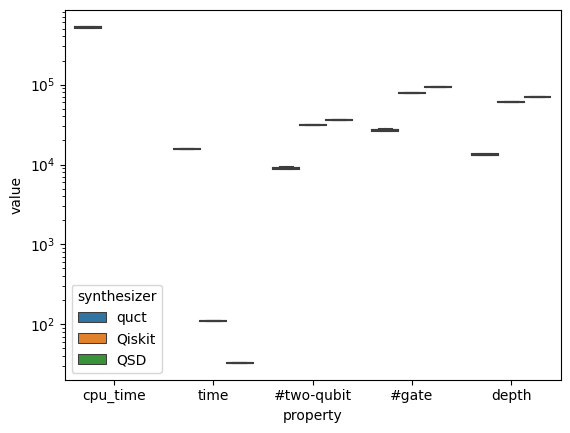

In [97]:
ax = sns.boxplot(x="property", y="value", hue="synthesizer", data=all_result_df)  # RUN PLOT  
ax.set_yscale('log')

In [98]:
for prop_name in ['#two-qubit', 'time', '#gate', 'depth', 'cpu_time']:
    prop_df = all_result_df[all_result_df['property'] == prop_name]

    ccd_df =  np.array(prop_df[prop_df['synthesizer'] == 'Qiskit']['value'])
    quct =  np.array(prop_df[prop_df['synthesizer'] == 'quct']['value'])

    # quct = quct[:len(ccd_df)]
    print(prop_name, float(ccd_df.mean() / quct.mean()),  float(quct.mean() / ccd_df.mean()))
    # print(prop_name, float((qfast_df / quct).mean()),  float( (quct / qfast_df).mean()))

'''似乎还会有qfast没有quct有的'''

#two-qubit 3.456267409470752 0.2893294648613798
time 0.0071984054907717875 138.91965398197976
#gate 2.9118553447443656 0.3434236531718202
depth 4.573528303308962 0.21864957067752197
cpu_time nan nan


/tmp/ipykernel_2099417/2877173684.py:8: RuntimeWarning: Mean of empty slice.
  print(prop_name, float(ccd_df.mean() / quct.mean()),  float(quct.mean() / ccd_df.mean()))
/home/luliqiang/miniconda3/envs/ISCA/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


'似乎还会有qfast没有quct有的'

In [99]:
for syn in syn_index:
    if syn == 'DNN':
        continue
    for prop_name in ['#two-qubit', 'time', '#gate', 'depth']:  # , 'cpu_time'
        prop_df = all_result_df[all_result_df['property'] == prop_name]
        # print(syn, prop_name, prop_df[prop_df['synthesizer'] == syn].mean())
        print(syn, prop_name, float(prop_df[prop_df['synthesizer'] == syn].mean()))

quct #two-qubit 8975.0
quct time 15490.287900686264
quct #gate 26933.0
quct depth 13267.0
Qiskit #two-qubit 31020.0
Qiskit time 111.50537347793579
Qiskit #gate 78425.0
Qiskit depth 60677.0
QSD #two-qubit 36480.0
QSD time 33.05147886276245
QSD #gate 93440.0
QSD depth 70915.0


/tmp/ipykernel_2099417/4277213078.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(syn, prop_name, float(prop_df[prop_df['synthesizer'] == syn].mean()))


In [100]:
iter_counts = []
second_per_iters = []
for quct_result in results:
    iter_counts.append(quct_result['iter_count'])
    second_per_iters.append(quct_result['cpu time']/quct_result['iter_count'])
sum(iter_counts) / len(iter_counts), sum(second_per_iters) / len(iter_counts)

(107.0, 2914.7250890871537)

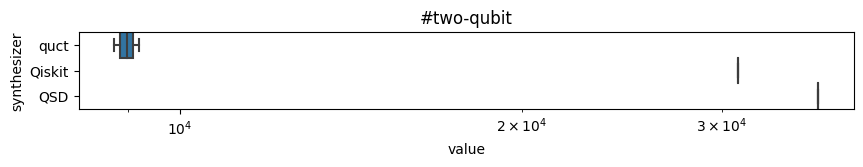

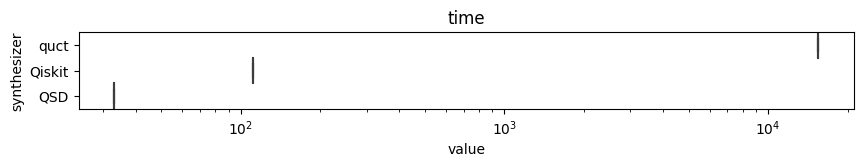

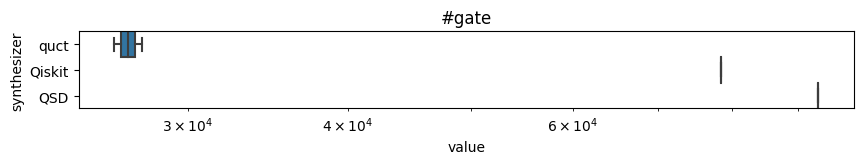

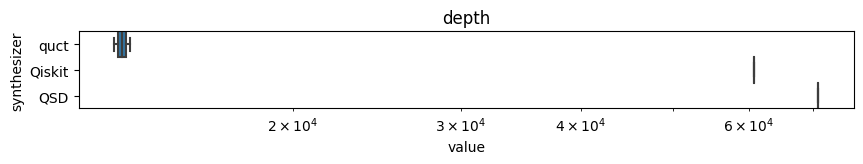

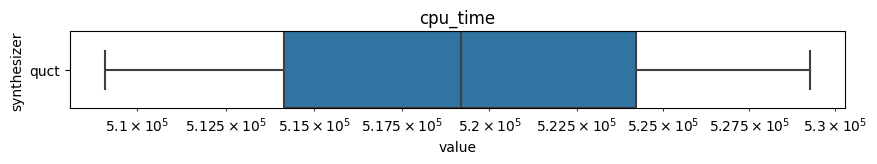

In [101]:
for prop_name in ['#two-qubit', 'time', '#gate', 'depth', 'cpu_time']:
    fig, ax = plt.subplots(figsize =(10, 1))

    plot_data = all_result_df[all_result_df['property'] == prop_name]
    ax = sns.boxplot(x="value", y="synthesizer", data=plot_data, fliersize=3, width =1, whis=10)  # RUN PLOT
    plt.title(prop_name)
    ax.set_xscale('log')
    fig.show()
    # fig.savefig(f'synthesis_evaluation_fig/qubit{n_qubits}_{prop_name}_{"linear" if linear else ""}.svg')